In [1]:
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from keras.applications import (vgg16,  vgg19, xception, inception_v3,  inception_resnet_v2,)
nb_closest_images = 5 

In [2]:
files = [x for x in os.listdir("dataset_images/") if x.endswith('jpg')] 
files = np.random.choice(files, 2000)
# Download the dataset from ----> https://www.kaggle.com/paramaggarwal/fashion-product-images-small

In [3]:
class ImageRecommender : 
    
    def __init__(self, model, list_of_image, filespath) : 
        self.model = model
        self.filespath = filespath
        self.list_of_image = list_of_image
        self.image_width = eval(str(self.model.layers[0].output.shape[1]))
        self.image_height = eval(str(self.model.layers[0].output.shape[2]))
        self.image_features_extractor = Model(inputs=self.model.input, 
                                               outputs=self.model.layers[-2].output)
        self.processed_image = self.Pics2Matrix()
        self.sim_table = self.GetSimilarity(self.processed_image)
        
    def ddl_images(self, image_url) :
        try : 
            return load_img(self.filespath + image_url, 
                            target_size=(self.image_width, self.image_height))
        except OSError : 
            self.list_of_image = [x for x in self.list_of_image if x != image_url]
            pass
        
    def Pics2Matrix(self) :
        list_of_expanded_array = list()
        for i in tqdm(range(len(self.list_of_image) - 1)) :
            try :
                tmp = img_to_array(self.ddl_images(self.list_of_image[i]))
                expand = np.expand_dims(tmp, axis = 0)
                list_of_expanded_array.append(expand)
            except ValueError : 
                self.list_of_image = [x for x in self.list_of_image if x != self.list_of_image[i]]
        images = np.vstack(list_of_expanded_array)
        return preprocess_input(images)
    
    def GetSimilarity(self, processed_imgs) :
        imgs_features = self.image_features_extractor.predict(processed_imgs)
        cosSimilarities = cosine_similarity(imgs_features)
        cos_similarities_df = pd.DataFrame(cosSimilarities, 
                                           columns=self.list_of_image[:len(self.list_of_image) -1],
                                           index=self.list_of_image[:len(self.list_of_image) -1])
        return cos_similarities_df
    
    def most_similar_to(self, given_img, nb_closest_images = 5):

        print("-----------------------------------------------------------------------")
        print("original image:")

        original = self.ddl_images(given_img)
        plt.imshow(original)
        plt.show()

        print("-----------------------------------------------------------------------")
        print("recommended image:")

        closest_imgs = self.sim_table[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
        closest_imgs_scores = self.sim_table[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

        for i in range(0,len(closest_imgs)):
            original = self.ddl_images(closest_imgs[i])
            plt.imshow(original)
            plt.show()
            print("similarity score : ",closest_imgs_scores[i])

In [4]:
vgg_model = vgg16.VGG16(weights='imagenet')

incepv2 = inception_resnet_v2.InceptionResNetV2(include_top=True, weights='imagenet', 
                                                input_tensor=None, input_shape=None, pooling=None, classes=1000)

incepv3 = inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, 
                                   input_shape=None, pooling=None, classes=1000)

Xception_ = xception.Xception(include_top=True, weights='imagenet', input_tensor=None, 
                              input_shape=None, pooling=None, classes=1000)


  3%|▎         | 57/1999 [00:00<00:03, 563.41it/s]

inception_v2 loaded
-----------------------------------------


100%|██████████| 1999/1999 [00:03<00:00, 596.35it/s]


-----------------------------------------
-----------------------------------------------------------------------
original image:


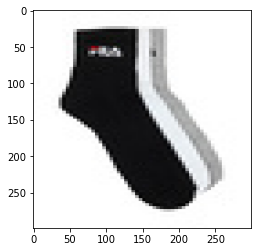

-----------------------------------------------------------------------
recommended image:


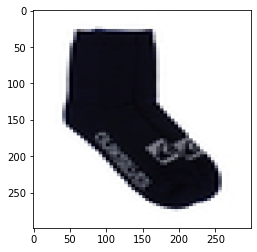

similarity score :  0.99989116


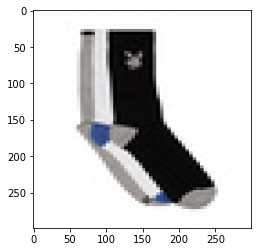

similarity score :  0.999824


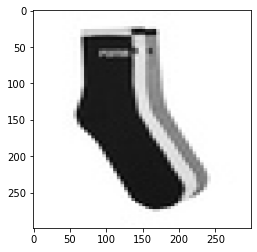

similarity score :  0.9997815


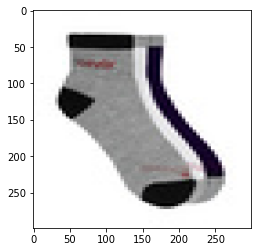

similarity score :  0.9997216


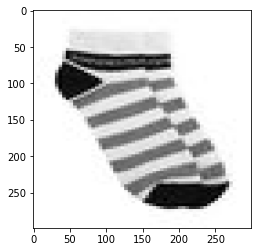

  0%|          | 0/1999 [00:00<?, ?it/s]

similarity score :  0.9997194
-----------------------------------------
Next model ...


inception_v3 loaded
-----------------------------------------


100%|██████████| 1999/1999 [00:02<00:00, 703.58it/s]


-----------------------------------------
-----------------------------------------------------------------------
original image:


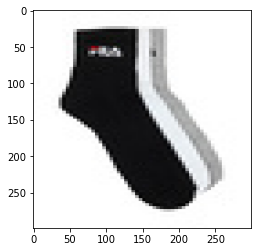

-----------------------------------------------------------------------
recommended image:


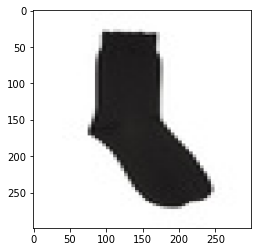

similarity score :  0.9781841


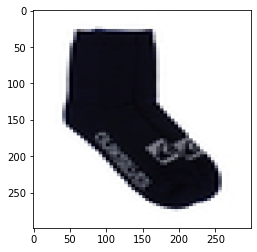

similarity score :  0.9703673


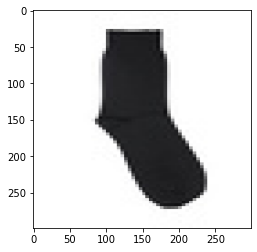

similarity score :  0.9697051


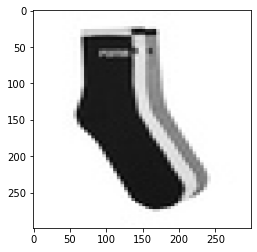

similarity score :  0.9695296


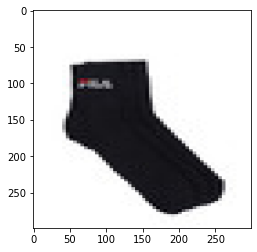

  0%|          | 0/1999 [00:00<?, ?it/s]

similarity score :  0.9651735
-----------------------------------------
Next model ...


Xception loaded
-----------------------------------------


100%|██████████| 1999/1999 [00:01<00:00, 1113.46it/s]


-----------------------------------------
-----------------------------------------------------------------------
original image:


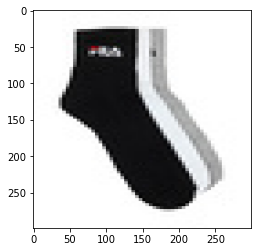

-----------------------------------------------------------------------
recommended image:


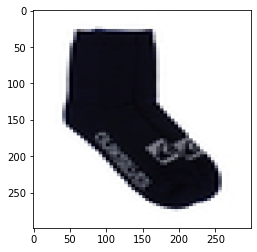

similarity score :  0.9914346


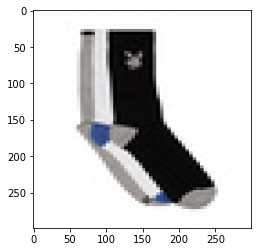

similarity score :  0.98747396


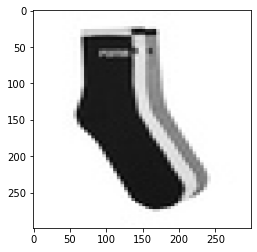

similarity score :  0.9866952


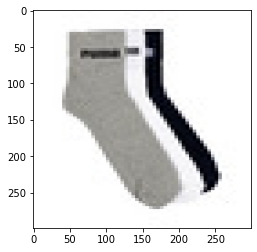

similarity score :  0.9850991


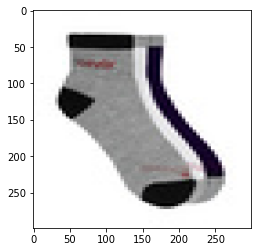

  0%|          | 0/1999 [00:00<?, ?it/s]

similarity score :  0.98452884
-----------------------------------------
Next model ...


vgg_model loaded
-----------------------------------------


100%|██████████| 1999/1999 [00:02<00:00, 696.00it/s]


-----------------------------------------
-----------------------------------------------------------------------
original image:


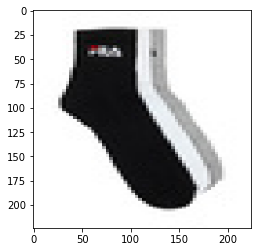

-----------------------------------------------------------------------
recommended image:


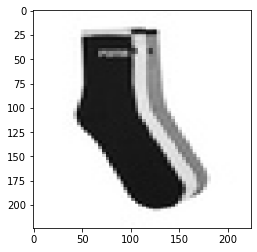

similarity score :  0.8458611


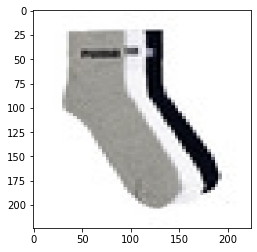

similarity score :  0.8339981


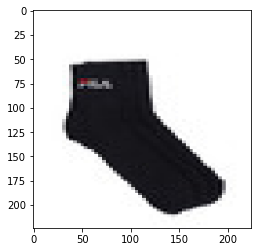

similarity score :  0.8248899


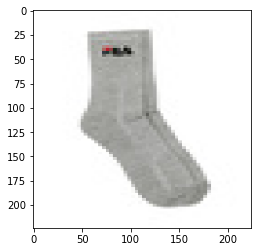

similarity score :  0.7769805


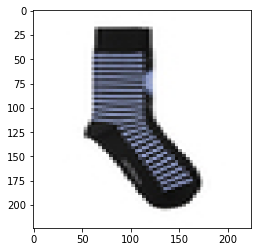

similarity score :  0.7705696
-----------------------------------------
Next model ...




In [7]:
%matplotlib inline 
from tqdm import tqdm

list_of_pretrained = [incepv2,
                      incepv3,
                      Xception_, 
                      vgg_model]
count = 0

for pretrained_model in list_of_pretrained : 
    if (count==0):
        print("inception_v2 loaded")
    elif (count ==1):
        print("inception_v3 loaded")
    elif (count ==2):
        print("Xception loaded")
    else:
        print("vgg_model loaded")
    count+=1
    print('-----------------------------------------')
    pretrained_recommender = ImageRecommender(pretrained_model, files, filespath = 'dataset_images/')
    print('-----------------------------------------')
    pretrained_recommender.most_similar_to(files[777])
    print('-----------------------------------------')
    print('Next model ...')
    print('\n')

